In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from sklearn.preprocessing import scale 
import math
import warnings
warnings.filterwarnings("ignore")
import random
import datetime
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import json
import urllib.parse
import requests
import glob
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix

In [4]:
train = pd.read_csv("train_sub_df.csv")   
test = pd.read_csv("test_sub_df.csv")  


In [5]:
columns =['airconditioningtypeid','architecturalstyletypeid',
 'basementsqft','bathroomcnt','bedroomcnt','buildingqualitytypeid',
 'calculatedbathnbr','decktypeid','finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15',
 'fips','fireplacecnt','fullbathcnt','garagecarcnt','garagetotalsqft',
 'heatingorsystemtypeid','latitude','longitude','lotsizesquarefeet',
 'poolcnt','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7',
 'propertylandusetypeid','rawcensustractandblock','regionidcity',
 'regionidcounty','regionidneighborhood','regionidzip','roomcnt',
 'threequarterbathnbr','unitcnt','yardbuildingsqft17','yardbuildingsqft26',
 'yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt',
 'assessmentyear','landtaxvaluedollarcnt','taxamount','taxdelinquencyyear',
 'censustractandblock','taxdelinquencyflag_Y','hashottuborspa_True',
 'fireplaceflag_True']


In [6]:
train.head(5)

,Unnamed: 0,parcelid,logerror,transactiondate,month,day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
0,0,11016594,0.0276,2016-01-01,1,Friday,1.0,-1.0,-1.0,2.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,-1.0,6.037107e+13,0,0,0
1,1,14366692,-0.1684,2016-01-01,1,Friday,-1.0,-1.0,-1.0,3.5,...,346458.0,585529.0,2015.0,239071.0,10153.02,-1.0,-1.000000e+00,0,0,0
2,2,12098116,-0.0040,2016-01-01,1,Friday,1.0,-1.0,-1.0,3.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,-1.0,6.037464e+13,0,0,0
3,3,12643413,0.0218,2016-01-02,1,Saturday,1.0,-1.0,-1.0,2.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,-1.0,6.037296e+13,0,0,0
4,4,14432541,-0.0050,2016-01-02,1,Saturday,-1.0,-1.0,-1.0,2.5,...,169574.0,434551.0,2015.0,264977.0,5488.96,-1.0,6.059042e+13,0,0,0


In [7]:
test.head(5)

,Unnamed: 0,ParcelId,201610,201611,201612,201710,201711,201712,parcelid,airconditioningtypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
0,0,10754147,0,0,0,0,0,0,10754147,-1.0,...,-1.0,9.0,2015.0,9.0,-1.00,-1.0,-1.0,0,0,0
1,1,10759547,0,0,0,0,0,0,10759547,-1.0,...,-1.0,27516.0,2015.0,27516.0,-1.00,-1.0,-1.0,0,0,0
2,2,10843547,0,0,0,0,0,0,10843547,-1.0,...,650756.0,1413387.0,2015.0,762631.0,20800.37,-1.0,-1.0,0,0,0
3,3,10859147,0,0,0,0,0,0,10859147,-1.0,...,571346.0,1156834.0,2015.0,585488.0,14557.57,-1.0,-1.0,0,0,0
4,4,10879947,0,0,0,0,0,0,10879947,-1.0,...,193796.0,433491.0,2015.0,239695.0,5725.17,-1.0,-1.0,0,0,0


In [8]:
#delete non-important columns
test_df = test.copy()
train_df = train.copy()

drop_test_cols = ['ParcelId','parcelid','Unnamed: 0',
                 '201610','201611','201612','201710',
                 '201711','201712']
drop_train_cols = ['parcelid','Unnamed: 0','logerror',
                  'transactiondate','month','day']
train_y = train['logerror']
test_df = test_df.drop(drop_test_cols,axis=1,inplace=False)
train_df = train_df.drop(drop_train_cols,axis=1,inplace=False)

test_df = test_df._get_numeric_data()
train_df = train_df._get_numeric_data()

col_names = train_df.columns.tolist()

In [9]:
print(test_df.shape, train_df.shape)

(2985217, 49) (90275, 49)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
     train_df, train_y, test_size=0.33, random_state=42)

In [11]:
rf = RandomForestRegressor(n_estimators=500,
                            max_features=6,
                            max_depth=11,
                            n_jobs=-1,
                            random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

feature_imp = pd.Series(rf.feature_importances_,index=col_names).sort_values(ascending=False)
target_pred=rf.predict(X_test)
target_pred_train=rf.predict(X_train)
test_err = round(metrics.mean_squared_error(y_test, target_pred),4)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),4)
print("MSE test:  ",test_err, '\n',
     "MSE train:  ",train_err)

MSE test:   0.0259 
 MSE train:   0.0221


In [59]:
threshold = np.arange(.005,.02,.001)
test_mse = []
train_mse = []
thresh = []
for i in threshold:
    sfm = SelectFromModel(rf, threshold=i)
    sfm.fit(X_train, y_train)

    feat_labels = X_train.columns.tolist()
    imp_labels = []

    for feature_list_index in sfm.get_support(indices=True):
        imp_labels.append(feat_labels[feature_list_index])
    
    
    rf = RandomForestRegressor(n_estimators=300,
                                max_features=6,
                                max_depth=11,
                                n_jobs=-1,
                                random_state=42)
    rf.fit(X_train[imp_labels], y_train)

    target_pred=rf.predict(X_test[imp_labels])
    target_pred_train=rf.predict(X_train[imp_labels])
    test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
    train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)
    test_mse.append(test_err)
    train_mse.append(train_err)
    thresh.append(round(i,3))
    print("Thresh: ",i, " MSE test: ",test_err, " MSE train: ",train_err)

Thresh:  0.005  MSE test:  0.0259  MSE train:  0.021837
Thresh:  0.006  MSE test:  0.0259  MSE train:  0.021837
Thresh:  0.007  MSE test:  0.025902  MSE train:  0.021869
Thresh:  0.008  MSE test:  0.02588  MSE train:  0.021965
Thresh:  0.009000000000000001  MSE test:  0.025891  MSE train:  0.021826
Thresh:  0.01  MSE test:  0.025887  MSE train:  0.021853
Thresh:  0.011  MSE test:  0.025887  MSE train:  0.021853
Thresh:  0.012  MSE test:  0.025842  MSE train:  0.021739
Thresh:  0.013000000000000001  MSE test:  0.025847  MSE train:  0.021762
Thresh:  0.014000000000000002  MSE test:  0.0258  MSE train:  0.02164
Thresh:  0.015  MSE test:  0.0258  MSE train:  0.02164
Thresh:  0.016  MSE test:  0.025846  MSE train:  0.021637
Thresh:  0.017  MSE test:  0.025795  MSE train:  0.021567
Thresh:  0.018000000000000002  MSE test:  0.025842  MSE train:  0.021354
Thresh:  0.019  MSE test:  0.025842  MSE train:  0.021354


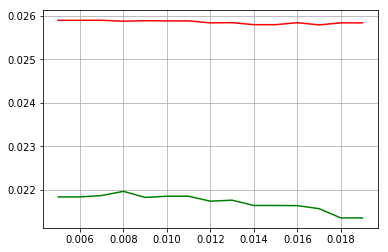

In [61]:
plt.grid()
plt.plot(thresh,test_mse, color='red')
plt.plot(thresh,train_mse, color='green')
plt.show()

In [ ]:
#looks like .014

In [64]:
best_thresh = .014
sfm = SelectFromModel(rf, threshold=.014)
sfm.fit(X_train, y_train)
feat_labels = X_train.columns.tolist()
imp_labels = []

for feature_list_index in sfm.get_support(indices=True):
    imp_labels.append(feat_labels[feature_list_index])
    
    
rf = RandomForestRegressor(n_estimators=300,
                                max_features=6,
                                max_depth=11,
                                n_jobs=-1,
                                random_state=42)
rf.fit(X_train[imp_labels], y_train)
feature_imp = pd.Series(rf.feature_importances_,index=imp_labels).sort_values(ascending=False)
print(feature_imp)

target_pred=rf.predict(X_test[imp_labels])
target_pred_train=rf.predict(X_train[imp_labels])
test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)

print("Thresh: ",best_thresh, " MSE test: ",test_err, " MSE train: ",train_err)

taxamount                       0.100613
structuretaxvaluedollarcnt      0.088638
latitude                        0.087816
taxvaluedollarcnt               0.084052
longitude                       0.079497
calculatedfinishedsquarefeet    0.073474
lotsizesquarefeet               0.073328
landtaxvaluedollarcnt           0.067138
finishedsquarefeet12            0.055705
yearbuilt                       0.051836
regionidzip                     0.046795
censustractandblock             0.036156
rawcensustractandblock          0.035628
regionidcity                    0.024903
regionidneighborhood            0.023857
bedroomcnt                      0.023836
calculatedbathnbr               0.015947
bathroomcnt                     0.015694
fullbathcnt                     0.015086
dtype: float64
Thresh:  0.014  MSE test:  0.0258  MSE train:  0.02164


In [68]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': [2, 3, 4],
    'n_estimators': [100, 200, 300, 1000],
    'random_state': [42]

}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train[imp_labels], y_train)
grid_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 49.7min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'n_estimators': 200,
 'random_state': 42}

In [69]:
rf = RandomForestRegressor(n_estimators=200,
                                max_features=2,
                                max_depth=11,
                                bootstrap=True,
                                n_jobs=-1,
                                random_state=42)
rf.fit(X_train[imp_labels], y_train)
feature_imp = pd.Series(rf.feature_importances_,index=imp_labels).sort_values(ascending=False)
print(feature_imp)

target_pred=rf.predict(X_test[imp_labels])
target_pred_train=rf.predict(X_train[imp_labels])
test_err = round(metrics.mean_squared_error(y_test, target_pred),6)
train_err = round(metrics.mean_squared_error(y_train, target_pred_train),6)

print("Thresh: ",best_thresh, " MSE test: ",test_err, " MSE train: ",train_err)

taxamount                       0.087974
structuretaxvaluedollarcnt      0.081034
latitude                        0.080462
taxvaluedollarcnt               0.080145
calculatedfinishedsquarefeet    0.074701
landtaxvaluedollarcnt           0.072906
longitude                       0.068313
lotsizesquarefeet               0.064147
finishedsquarefeet12            0.060332
yearbuilt                       0.050128
regionidzip                     0.047883
censustractandblock             0.044235
rawcensustractandblock          0.043985
bedroomcnt                      0.028465
regionidneighborhood            0.026591
calculatedbathnbr               0.025697
regionidcity                    0.022993
bathroomcnt                     0.021766
fullbathcnt                     0.018244
dtype: float64
Thresh:  0.014  MSE test:  0.025856  MSE train:  0.021673


In [70]:
test_pred=rf.predict(test_df[imp_labels])

In [71]:
fudge_nov = 0.8879242828636326
fudge_dec = 1.1701592749545944



In [100]:

sample_sub = pd.read_csv("sample_submission.csv")
parc_id =np.array(sample_sub['ParcelId'])
oct_col = np.around(np.array(test_pred),decimals=4)
nov_col = np.around(fudge_nov * np.array(test_pred),decimals=4)
dec_col = np.around(fudge_dec * np.array(test_pred),decimals=4)



submit_df = pd.DataFrame({'ParcelId':parc_id,
                          '201610':oct_col, '201611':nov_col,
                          '201612':dec_col,'201710':oct_col, 
                          '201711':nov_col,'201712':dec_col})

cols = submit_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
submit_df = submit_df[cols]


In [101]:
submit_df.head(3)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.2195,0.1949,0.2568,0.2195,0.1949,0.2568
1,10759547,0.1114,0.0989,0.1303,0.1114,0.0989,0.1303
2,10843547,0.0550,0.0488,0.0643,0.0550,0.0488,0.0643


In [102]:
# Give the filename you wish to save the file to

filename1 = 'submission_file2.csv'

files_present_1 = glob.glob(filename1)

if not files_present_1 or not files_present_2:
    submit_df.to_csv(filename1,index = False)
    print('Success!')
else:
    print('WARNING: This file already exists!' )

Success!


In [113]:
log_low_df = train.sort_values("logerror")
log_low_df.head(10)

,Unnamed: 0,parcelid,logerror,transactiondate,month,day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
6416,6416,12728547,-4.605,2016-01-29,1,Friday,-1.0,-1.0,-1.0,1.0,...,57838.0,289210.0,2015.0,231372.0,3821.81,-1.0,6.037503e+13,0,0,0
69228,69228,17257462,-4.605,2016-08-24,8,Wednesday,-1.0,-1.0,-1.0,2.5,...,221718.0,367233.0,2015.0,145515.0,4274.12,-1.0,6.111008e+13,0,0,0
88788,88788,11557016,-4.510,2016-12-05,12,Monday,-1.0,-1.0,-1.0,2.0,...,133772.0,668863.0,2015.0,535091.0,8238.68,-1.0,6.037272e+13,0,0,0
2079,2079,10931889,-3.194,2016-01-12,1,Tuesday,1.0,-1.0,-1.0,2.0,...,131254.0,310699.0,2015.0,179445.0,3870.52,-1.0,6.037143e+13,0,0,0
6688,6688,13895495,-2.976,2016-02-01,2,Monday,-1.0,-1.0,-1.0,3.0,...,149553.0,455624.0,2015.0,306071.0,5583.90,-1.0,6.059063e+13,0,1,0
53882,53882,11633947,-2.688,2016-07-08,7,Friday,13.0,-1.0,-1.0,0.0,...,147062.0,786483.0,2015.0,639421.0,10100.28,-1.0,6.037701e+13,0,0,0
65596,65596,14413432,-2.397,2016-08-12,8,Friday,-1.0,-1.0,-1.0,2.5,...,147291.0,645000.0,2015.0,497709.0,6645.20,-1.0,6.059042e+13,0,0,0
23511,23511,11563783,-2.375,2016-04-07,4,Thursday,-1.0,-1.0,-1.0,2.0,...,172575.0,523065.0,2015.0,350490.0,6365.73,-1.0,6.037267e+13,0,0,0
43989,43989,14484884,-2.365,2016-06-09,6,Thursday,-1.0,-1.0,-1.0,2.5,...,237658.0,268655.0,2015.0,30997.0,2748.96,-1.0,6.059032e+13,0,0,0
13447,13447,12943054,-2.365,2016-03-02,3,Wednesday,-1.0,-1.0,-1.0,2.0,...,30168.0,47279.0,2015.0,17111.0,4361.73,-1.0,6.037407e+13,0,0,0


In [111]:
train.describe()

,Unnamed: 0,parcelid,logerror,month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
count,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,...,9.027500e+04,9.027500e+04,90275.0,9.027500e+04,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000
mean,45137.000000,1.298466e+07,0.011457,5.849848,-0.102099,-0.976206,-0.659629,2.279474,3.031869,3.171897,...,1.793353e+05,4.576676e+05,2015.0,2.783322e+05,5983.578144,-0.715536,6.008611e+13,0.019751,0.026198,0.002459
std,26060.292113,2.504510e+06,0.161079,2.812690,2.131357,0.465302,18.224563,1.004271,1.156436,3.504419,...,2.090147e+05,5.548834e+05,0.0,4.004943e+05,6838.823734,2.040045,4.939707e+12,0.139143,0.159724,0.049529
min,0.000000,1.071174e+07,-4.605000,1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,...,-1.000000e+00,-1.000000e+00,2015.0,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,22568.500000,1.155950e+07,-0.025300,4.000000,-1.000000,-1.000000,-1.000000,2.000000,2.000000,-1.000000,...,8.064100e+04,1.990125e+05,2015.0,8.222750e+04,2872.470000,-1.000000,6.037311e+13,0.000000,0.000000,0.000000
50%,45137.000000,1.254734e+07,0.006000,6.000000,-1.000000,-1.000000,-1.000000,2.000000,3.000000,4.000000,...,1.315070e+05,3.428720e+05,2015.0,1.929600e+05,4542.440000,-1.000000,6.037603e+13,0.000000,0.000000,0.000000
75%,67705.500000,1.422755e+07,0.039200,8.000000,1.000000,-1.000000,-1.000000,3.000000,4.000000,7.000000,...,2.100425e+05,5.405890e+05,2015.0,3.454150e+05,6900.600000,-1.000000,6.059042e+13,0.000000,0.000000,0.000000
max,90274.000000,1.629608e+08,4.737000,12.000000,13.000000,21.000000,1555.000000,20.000000,16.000000,12.000000,...,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,1.000000,1.000000,1.000000


In [12]:
def make_outlier_class(df,thresh):
    upper = abs(thresh)
    lower = -abs(thresh)
    col = np.array(df['logerror'])
    outlier_pos = np.where((col>=upper), 1, 0)
    outlier_neg = np.where((col<=lower), 1, 0)
    outlier = (outlier_pos + outlier_neg).tolist()
    
    return outlier

In [119]:
train['outlier_25'] = make_outlier_class(train,2)

In [120]:
train.head()

,Unnamed: 0,parcelid,logerror,transactiondate,month,day,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True,outlier_25
0,0,11016594,0.0276,2016-01-01,1,Friday,1.0,-1.0,-1.0,2.0,...,360170.0,2015.0,237416.0,6735.88,-1.0,6.037107e+13,0,0,0,0
1,1,14366692,-0.1684,2016-01-01,1,Friday,-1.0,-1.0,-1.0,3.5,...,585529.0,2015.0,239071.0,10153.02,-1.0,-1.000000e+00,0,0,0,0
2,2,12098116,-0.0040,2016-01-01,1,Friday,1.0,-1.0,-1.0,3.0,...,119906.0,2015.0,57912.0,11484.48,-1.0,6.037464e+13,0,0,0,0
3,3,12643413,0.0218,2016-01-02,1,Saturday,1.0,-1.0,-1.0,2.0,...,244880.0,2015.0,73362.0,3048.74,-1.0,6.037296e+13,0,0,0,0
4,4,14432541,-0.0050,2016-01-02,1,Saturday,-1.0,-1.0,-1.0,2.5,...,434551.0,2015.0,264977.0,5488.96,-1.0,6.059042e+13,0,0,0,0


In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
X = train.copy()
y = X['outlier_25']
X.drop(['month','parcelid','logerror','transactiondate','outlier_25'], axis=1, inplace=True)


In [123]:
X=X._get_numeric_data()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)



In [125]:
X_train_df =pd.DataFrame(X_train_res,columns=X_train.columns.tolist())
X_train_df.head()

,Unnamed: 0,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,taxdelinquencyflag_Y,hashottuborspa_True,fireplaceflag_True
0,42574.0,-1.0,-1.0,-1.0,2.0,4.0,-1.0,2.0,-1.0,1364.0,...,105044.0,129697.0,2015.0,24653.0,1402.22,-1.0,6.111009e+13,0.0,0.0,0.0
1,43927.0,13.0,-1.0,-1.0,2.5,4.0,-1.0,2.5,-1.0,-1.0,...,140831.0,825507.0,2015.0,684676.0,8537.00,-1.0,6.059063e+13,0.0,0.0,0.0
2,18940.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,1.0,-1.0,-1.0,...,25451.0,399597.0,2015.0,374146.0,4741.00,-1.0,6.059011e+13,0.0,0.0,0.0
3,50559.0,-1.0,-1.0,-1.0,1.5,1.0,-1.0,1.5,-1.0,-1.0,...,304316.0,675000.0,2015.0,370684.0,7595.54,-1.0,6.059063e+13,0.0,0.0,0.0
4,34914.0,-1.0,-1.0,-1.0,2.5,4.0,-1.0,2.5,-1.0,-1.0,...,159632.0,290131.0,2015.0,130499.0,3563.50,-1.0,6.059086e+13,0.0,0.0,0.0


In [83]:
gbm_param_grid = {
    'colsample_bytree': [.8],
    'n_estimators': [200,300,400,700,1100],
    'max_depth': [10],
    'learning_rate':[.1],
    'subsample':[.5],
    'gamma':[0]
    
    
}

In [305]:
# Create the parameter grid: gbm_param_grid 
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {
     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    
}

# Instantiate the regressor: gbm
gbm = xgb.XGBClassifier(n_estimators=300,
                        learning_rate=.005,
                       min_child_weight=4,
                       max_depth=10,
                       colsample_bytree=.6,
                       subsample=.6)

# Perform random search: grid_mse
gs_roc = GridSearchCV(param_grid=gbm_param_grid,
                      estimator=gbm,
                      scoring="roc_auc",
                      cv=3, 
                      n_jobs=-1,
                      verbose=1)

# Fit randomized_mse to the data
gs_roc.fit(X_train_res,y_train_res)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", gs_roc.best_params_)
print("Best ROC_AUC: ", gs_roc.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished


Best parameters found:  {'reg_alpha': 1e-05}
Best ROC_AUC:  0.9832777958120048


In [442]:
model = xgb.XGBClassifier(  colsample_bytree= .7,
                            n_estimators =400,
                            max_depth=9,
                            learning_rate=.005,
                            min_child_weight=5,
                            subsample=.6,
                            gamma=0,
                            scoring="roc_auc",
                            cv=3, 
                            n_jobs=-1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None,
                           verbose=0)
model.fit(X_train_df, y_train_res, eval_metric='auc', verbose=True,
            eval_set=[(X_test, y_test)], early_stopping_rounds=5)
y_pre = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pre)

#print("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))
print(matrix)

[0]	validation_0-auc:0.623239
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.630088
[2]	validation_0-auc:0.651752
[3]	validation_0-auc:0.657073
[4]	validation_0-auc:0.659185
[5]	validation_0-auc:0.660224
[6]	validation_0-auc:0.661419
[7]	validation_0-auc:0.659514
[8]	validation_0-auc:0.661807
[9]	validation_0-auc:0.662546
[10]	validation_0-auc:0.662825
[11]	validation_0-auc:0.664212
[12]	validation_0-auc:0.667171
[13]	validation_0-auc:0.667219
[14]	validation_0-auc:0.669719
[15]	validation_0-auc:0.670202
[16]	validation_0-auc:0.670118
[17]	validation_0-auc:0.670517
[18]	validation_0-auc:0.671072
[19]	validation_0-auc:0.671219
[20]	validation_0-auc:0.671395
[21]	validation_0-auc:0.671936
[22]	validation_0-auc:0.672164
[23]	validation_0-auc:0.671975
[24]	validation_0-auc:0.67336
[25]	validation_0-auc:0.673053
[26]	validation_0-auc:0.673254
[27]	validation_0-auc:0.673436
[28]	validation_0-auc:0.673507
[29]	validation_0-auc:0.673407
[30]	validation_0-

In [451]:
total_1 = y_test.value_counts()

print(matrix[0][1]/matrix[1][1])
print(matrix[1][1]/total_1[1])

4.678571428571429
0.06896551724137931


In [371]:
#test_df.drop(['outlier_5','outlier_2','outlier_1'],axis=1,inplace=True)
#X_test.drop(['outlier_5','outlier_2','outlier_1'],axis=1,inplace=True)


#test_df.shape
print(test_df.shape,X_test.shape)

(2985217, 49) (27083, 49)


In [372]:
train['outlier_25'] = make_outlier_class(train,.2)
X = train.copy()
y_reg = X['logerror']
y = X['outlier_25']
X.drop(['month','parcelid','transactiondate','outlier_25'], axis=1, inplace=True)
X=X._get_numeric_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

X_train =pd.DataFrame(X_train_res,columns=X_train.columns.tolist())
X_train['target'] = y_train_res
X_train_df = X_train.sample(n=180000,replace=True)
y_train_res = X_train_df['target']
X_train_df.drop(['Unnamed: 0','target','logerror'], axis=1,inplace=True)
X_test.drop(['Unnamed: 0','logerror'], axis=1,inplace=True)
print(X_train_df.shape,X_test.shape,len(y_train_res))

(180000, 49) (27083, 49) 180000


In [373]:
rf = RandomForestClassifier(n_estimators=500,
                            max_features=2,
                           max_depth=3,
                           n_jobs=-1,
                           random_state=42)

# Train the classifier
rf.fit(X_train_df, y_train_res)

# prediction on test set
target_pred=rf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(y_test, target_pred))

Accuracy: 0.7045379020049477 
Cohans Kappa: 0.07222344398007174


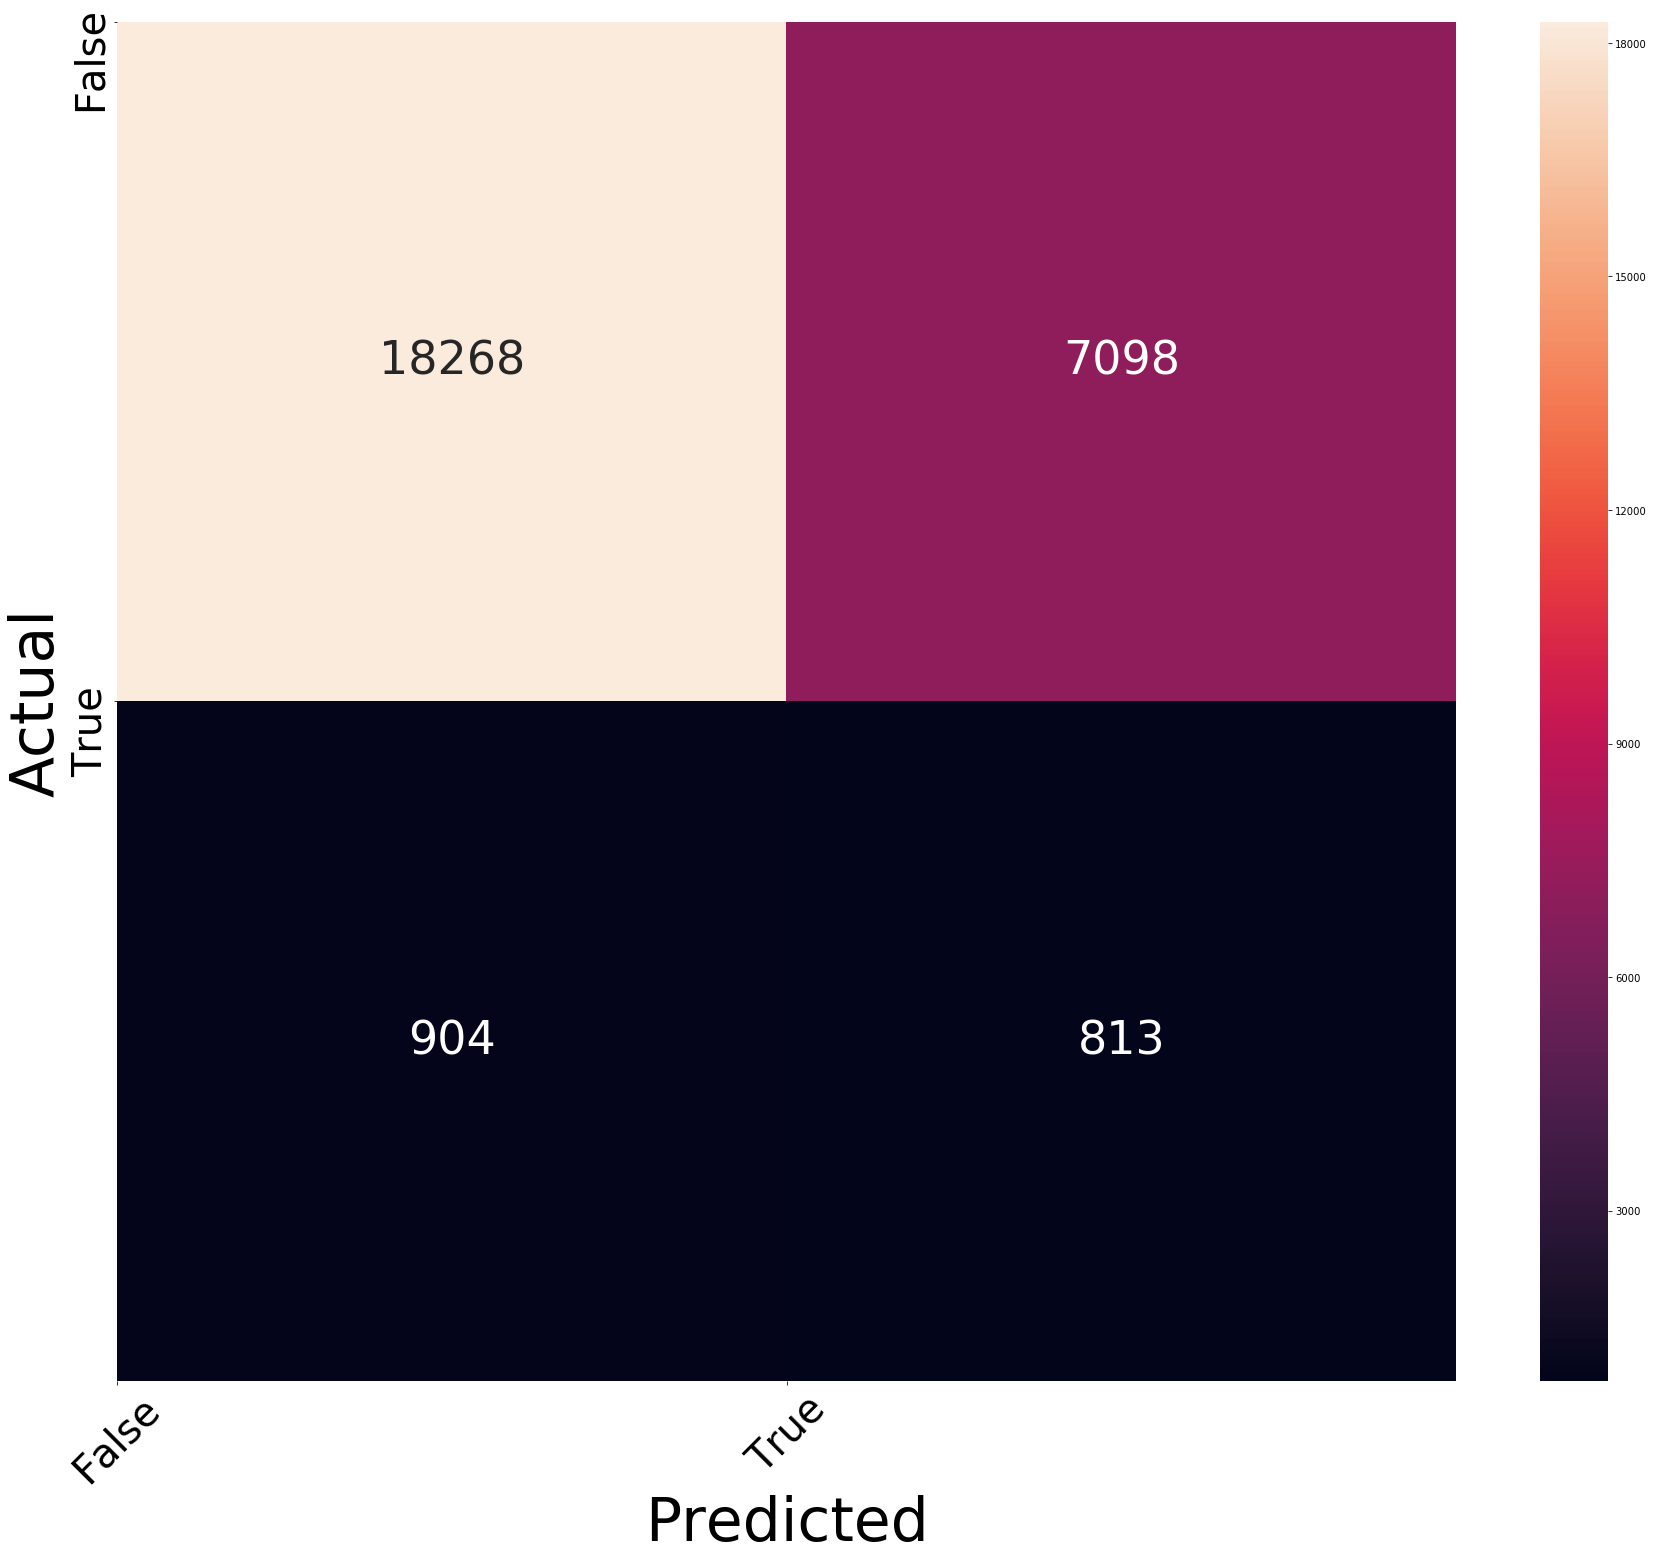

In [374]:
tar_true = y_test.values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(y_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [375]:
test_feat_pred=rf.predict_proba(test_df)
val_feat_pred=rf.predict_proba(X_test)
train_feat_pred=rf.predict_proba(X_train_df)




test_feat2 = test_feat_pred[:,0]
val_feat2 = val_feat_pred[:,0]
train_feat2 = train_feat_pred[:,0]

In [376]:
print(len(test_feat_pred[:,0]),test_df.shape)

2985217 (2985217, 49)


In [377]:
train['outlier_25'] = make_outlier_class(train,.5)
X = train.copy()
y_reg = X['logerror']
y = X['outlier_25']
X.drop(['month','parcelid','transactiondate','outlier_25'], axis=1, inplace=True)
X=X._get_numeric_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

X_train =pd.DataFrame(X_train_res,columns=X_train.columns.tolist())
X_train['target'] = y_train_res
X_train_df = X_train.sample(n=180000,replace=True)
y_train_res = X_train_df['target']
X_train_df.drop(['Unnamed: 0','target','logerror'], axis=1,inplace=True)
X_test.drop(['Unnamed: 0','logerror'], axis=1,inplace=True)


rf = RandomForestClassifier(n_estimators=500,
                            max_features=2,
                           max_depth=2,
                           n_jobs=-1,
                           random_state=42)

# Train the classifier
rf.fit(X_train_df, y_train_res)

# prediction on test set
target_pred=rf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(y_test, target_pred))

Accuracy: 0.746483033637337 
Cohans Kappa: 0.020713993876235626


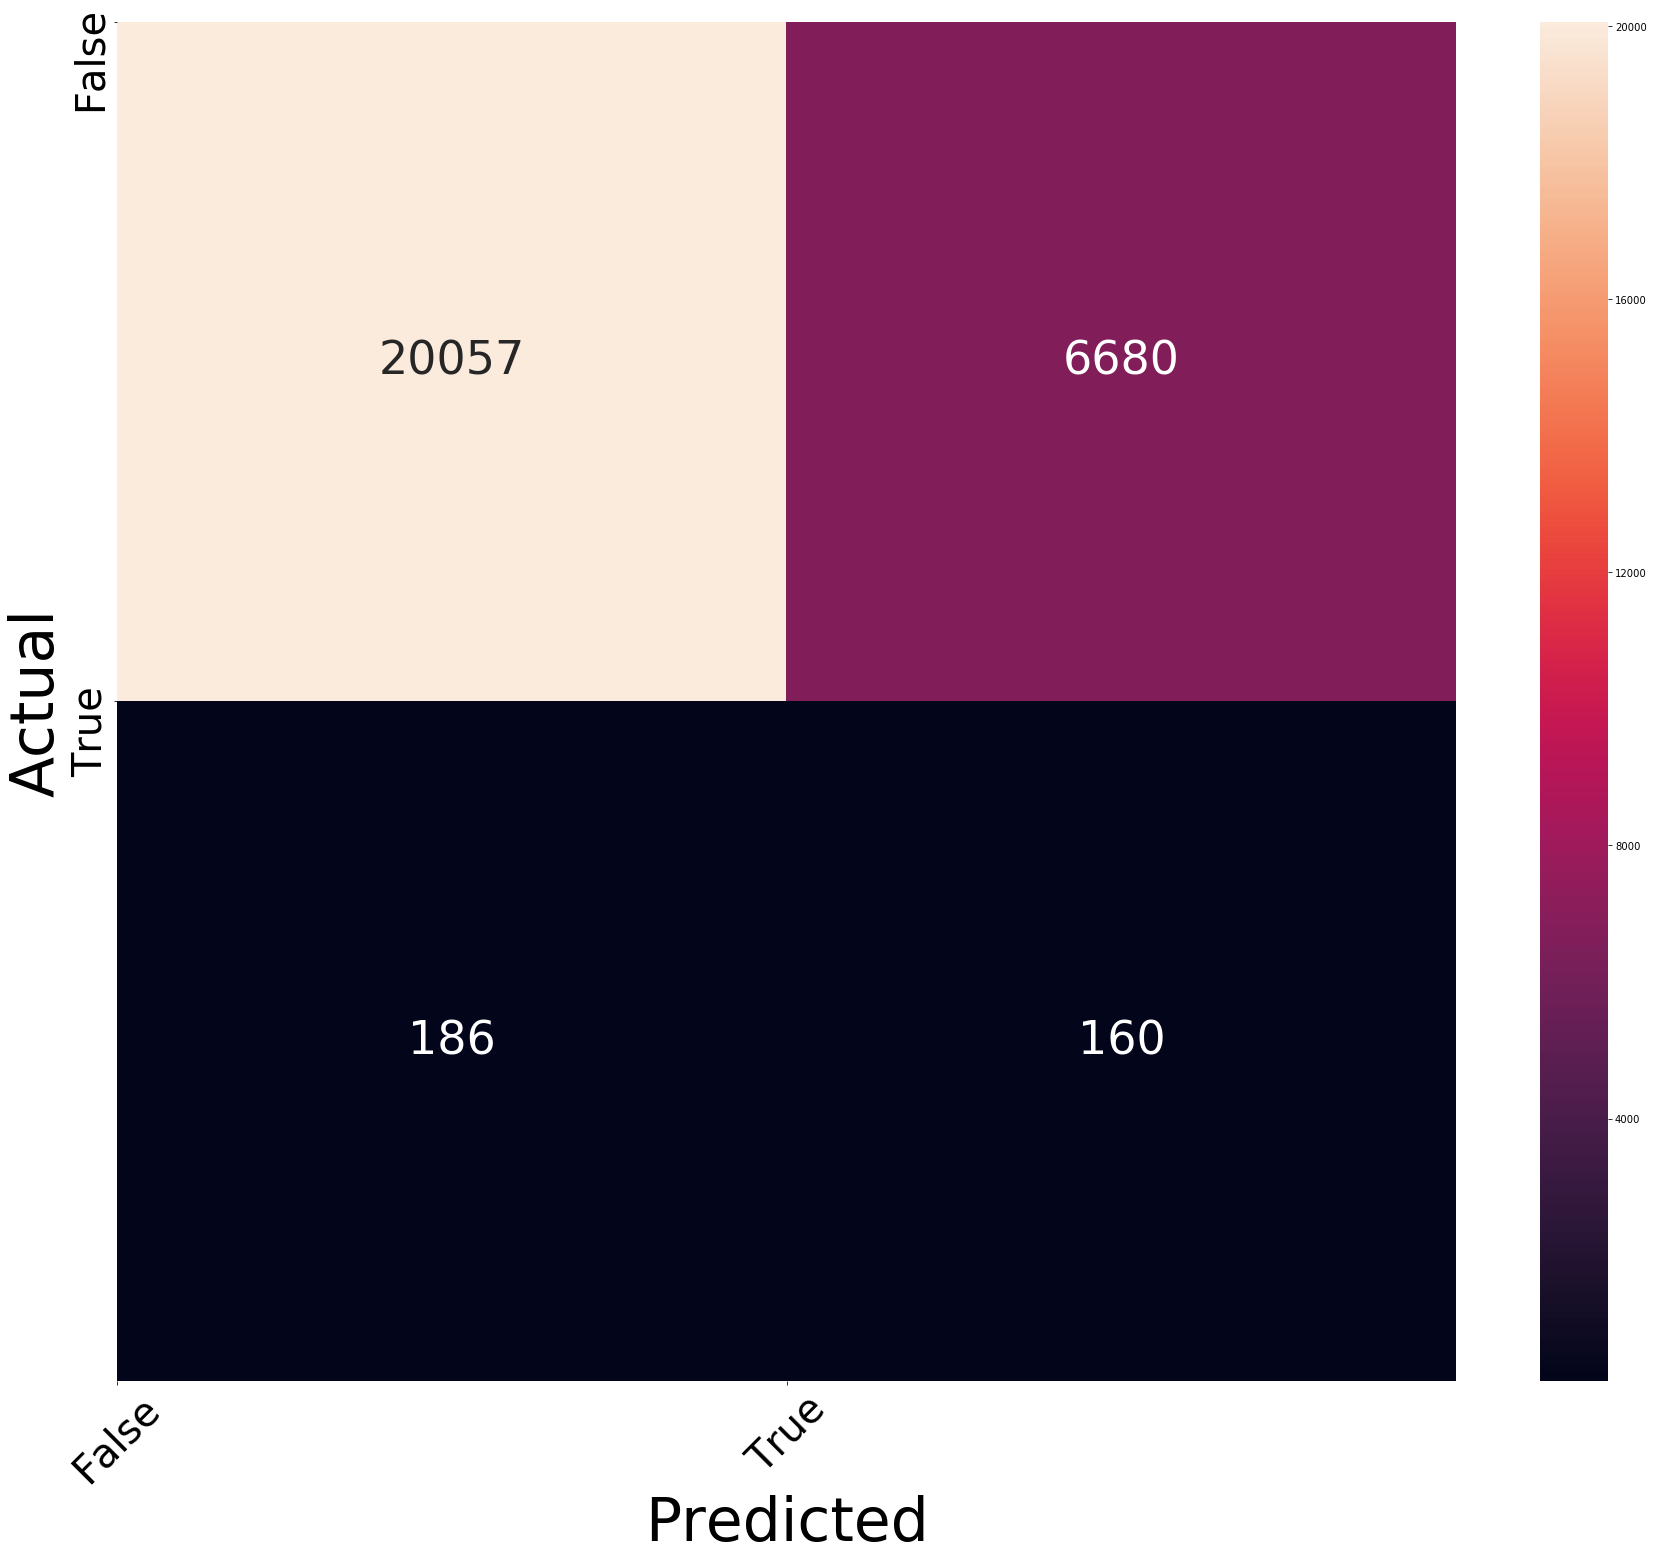

In [378]:
tar_true = y_test.values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(y_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [379]:
test_feat_pred=rf.predict_proba(test_df)
val_feat_pred=rf.predict_proba(X_test)
train_feat_pred=rf.predict_proba(X_train_df)

test_feat5 = test_feat_pred[:,0]
val_feat5 = val_feat_pred[:,0]
train_feat5 = train_feat_pred[:,0]

In [380]:
print(len(test_feat_pred[:,0]),test_df.shape)

2985217 (2985217, 49)


In [381]:
train['outlier_25'] = make_outlier_class(train,1)
X = train.copy()
y_reg = X['logerror']
y = X['outlier_25']
X.drop(['month','parcelid','transactiondate','outlier_25'], axis=1, inplace=True)
X=X._get_numeric_data()

X['logerror'] = y_reg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print(X_train['logerror'])

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


X_train =pd.DataFrame(X_train_res,columns=X_train.columns.tolist())
y_train_reg = X_train['logerror']

#X_train.drop(['logerror'], axis=1,inplace=True)




X_train['target'] = y_train_res
X_train_df = X_train.sample(n=180000,replace=True)
y_train_res = X_train_df['target']

y_train_reg = X_train_df['logerror']
y_test_reg = X_test['logerror']
X_train_df.drop(['Unnamed: 0','target','logerror'], axis=1,inplace=True)
X_test.drop(['Unnamed: 0','logerror'], axis=1,inplace=True)

rf = RandomForestClassifier(n_estimators=500,
                            max_features=2,
                           max_depth=2,
                           n_jobs=-1,
                           random_state=42)

# Train the classifier
rf.fit(X_train_df, y_train_res)

# prediction on test set
target_pred=rf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(y_test, target_pred))

Accuracy: 0.7616955285603515 
Cohans Kappa: 0.002746835726281538


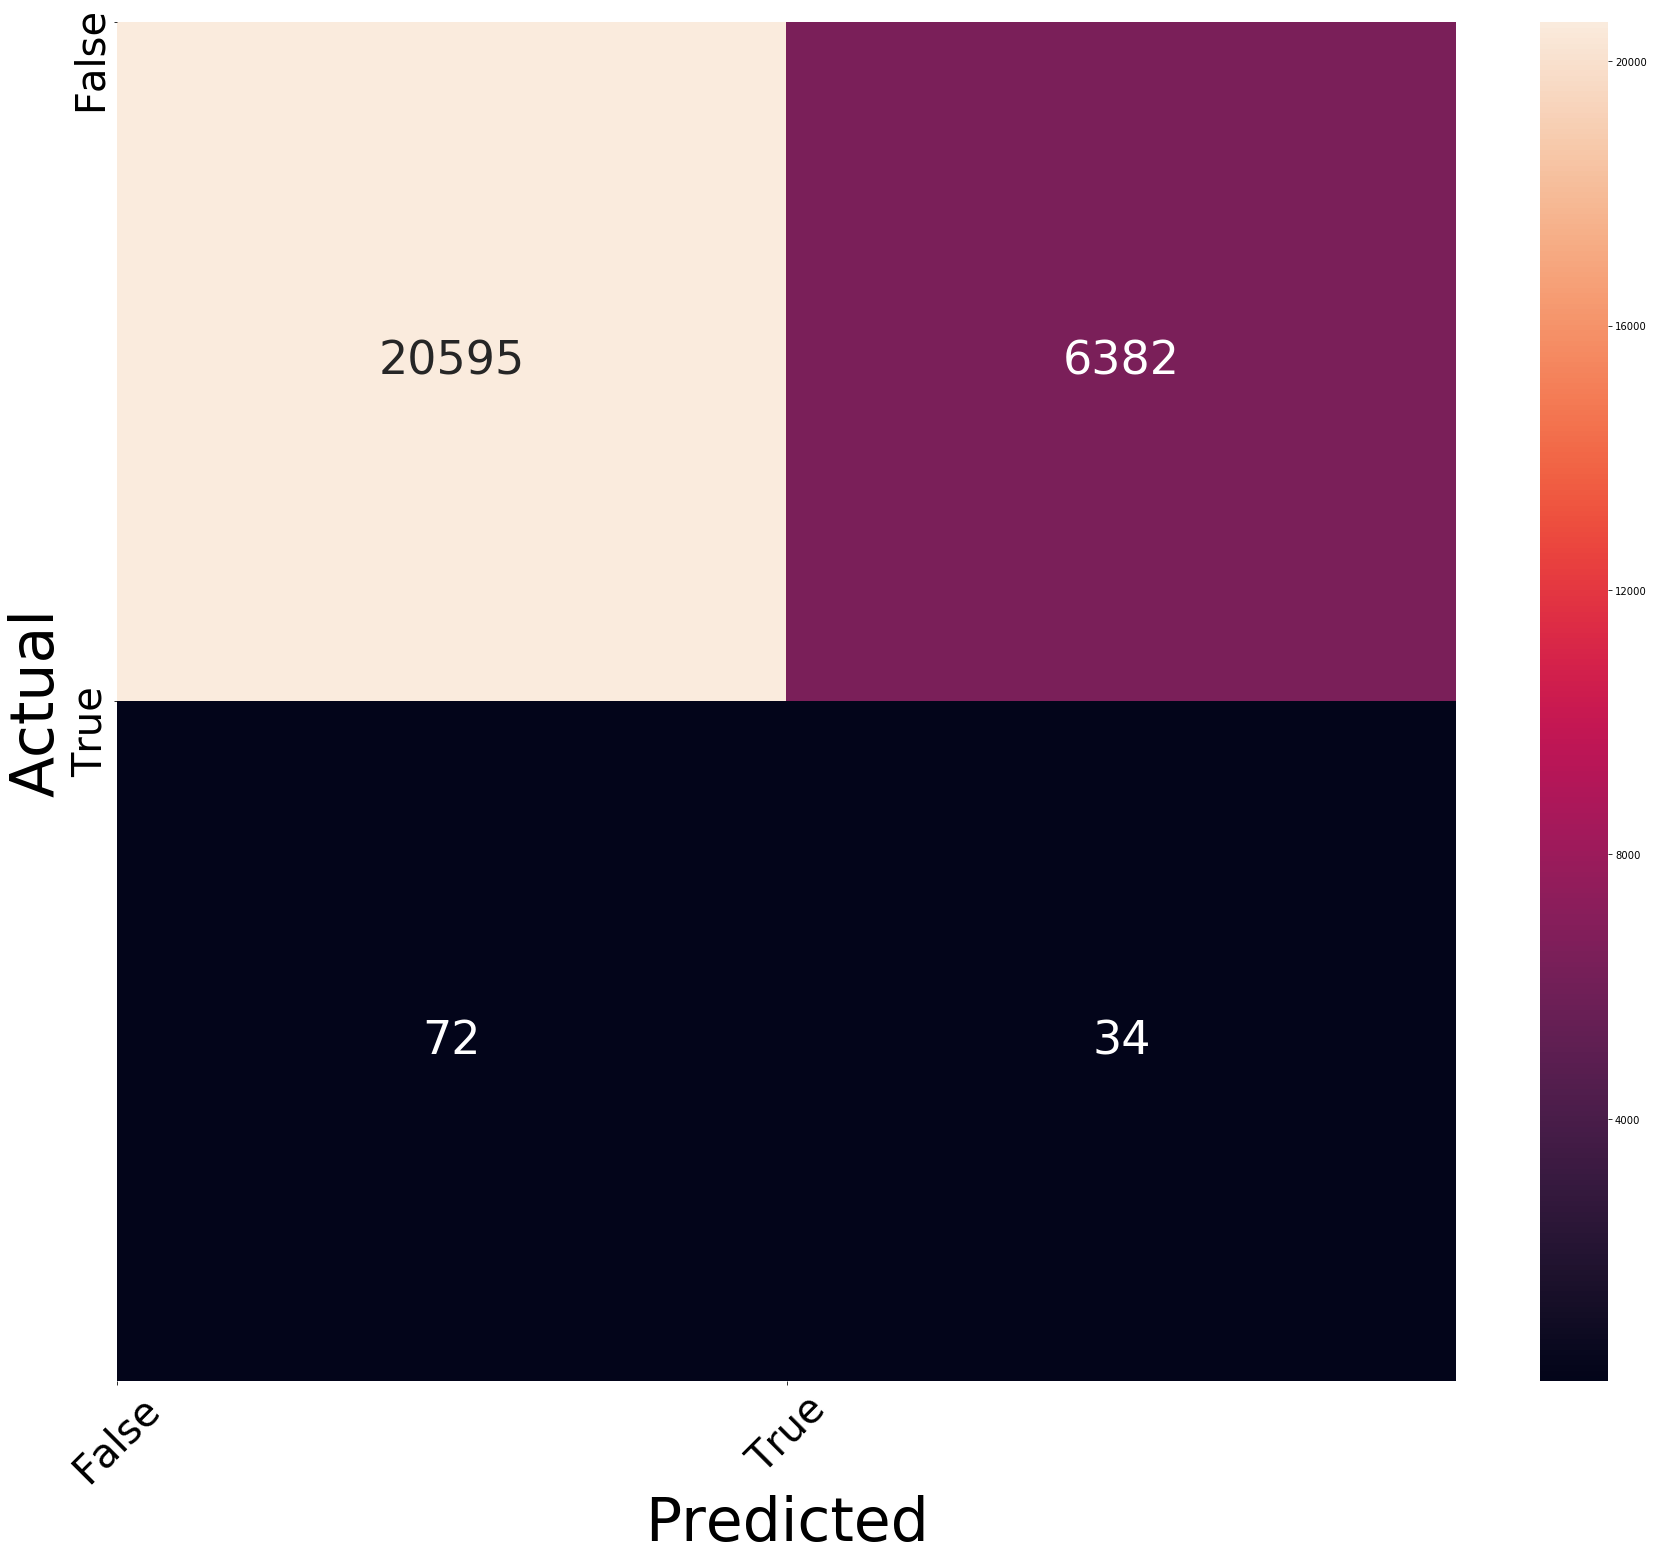

In [382]:
tar_true = y_test.values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(y_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [383]:
test_feat_pred=rf.predict_proba(test_df)
val_feat_pred=rf.predict_proba(X_test)
train_feat_pred=rf.predict_proba(X_train_df)

test_feat1 = test_feat_pred[:,0]
val_feat1 = val_feat_pred[:,0]
train_feat1 = train_feat_pred[:,0]

In [384]:
print(len(test_feat_pred[:,0]),test_df.shape)

2985217 (2985217, 49)


In [385]:
X_test['outlier_1'] = val_feat1
X_test['outlier_5'] = val_feat5
X_test['outlier_2'] = val_feat2

test_df['outlier_1'] = test_feat1
test_df['outlier_5'] = test_feat5
test_df['outlier_2'] = test_feat2

X_train_df['outlier_1'] = train_feat1
X_train_df['outlier_5'] = train_feat5
X_train_df['outlier_2'] = train_feat2

In [386]:
print(len(test_feat1),test_df.shape)

2985217 (2985217, 52)


In [387]:
print(len(train_feat2),X_train_df.shape,y_train_res.shape)

180000 (180000, 52) (180000,)


In [1]:
# Create the parameter grid: gbm_param_grid 
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {
    'colsample_bytree': [.7,.8],
    'max_depth': [8,9,10],
#     'subsample':[.5],
#     'gamma':[0]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(learning_rate=.1,
                      n_estimators=150
                      )

# Perform random search: grid_mse
gs_mse = GridSearchCV(param_grid=gbm_param_grid,
                      estimator=gbm,
                      scoring="neg_mean_squared_error",
                      cv=3, 
                      n_jobs=-1,
                      verbose=1)

# Fit randomized_mse to the data
gs_mse.fit(X_train_df,y_train_res)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", gs_mse.best_params_)
print("Best MSE: ", np.sqrt(np.abs(gs_mse.best_score_)))

In [392]:
print(X_test.shape,X_train_df.shape,len(y_test_reg),len( y_train_res))

(27083, 52) (180000, 52) 27083 180000


In [475]:


model = xgb.XGBRegressor(  colsample_bytree= .84,
                            n_estimators =1000,
                            max_depth=10,
                            learning_rate=.15,
                            min_child_weight=4,
                            subsample=.65,
                            gamma=0,
                            scoring="rmse",
                            cv=3, 
                            n_jobs=-1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None,
                           verbose=0)
model.fit(X_train_df, y_train_reg, eval_metric='rmse', verbose=True,
            eval_set=[(X_test, y_test_reg)], early_stopping_rounds=10)
y_pre = model.predict(X_test)
y_preds = model.predict(X_train_df)
print("MSE Validation : %.4g" % metrics.mean_squared_error(y_test_reg, y_pre))


[0]	validation_0-rmse:0.459054
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.417667
[2]	validation_0-rmse:0.381151
[3]	validation_0-rmse:0.351341
[4]	validation_0-rmse:0.322203
[5]	validation_0-rmse:0.300357
[6]	validation_0-rmse:0.283294
[7]	validation_0-rmse:0.266908
[8]	validation_0-rmse:0.255056
[9]	validation_0-rmse:0.24687
[10]	validation_0-rmse:0.241591
[11]	validation_0-rmse:0.236534
[12]	validation_0-rmse:0.233225
[13]	validation_0-rmse:0.230279
[14]	validation_0-rmse:0.228953
[15]	validation_0-rmse:0.226439
[16]	validation_0-rmse:0.223751
[17]	validation_0-rmse:0.222173
[18]	validation_0-rmse:0.221162
[19]	validation_0-rmse:0.219585
[20]	validation_0-rmse:0.218981
[21]	validation_0-rmse:0.218345
[22]	validation_0-rmse:0.218215
[23]	validation_0-rmse:0.218043
[24]	validation_0-rmse:0.217852
[25]	validation_0-rmse:0.217257
[26]	validation_0-rmse:0.21674
[27]	validation_0-rmse:0.216662
[28]	validation_0-rmse:0.216264
[29]	validation_0-r

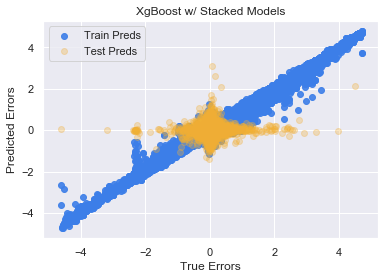

In [477]:
sns.set()

plt.scatter(y_train_reg, y_preds,color="#3c7ee8", label="Train Preds",alpha=.9)
plt.scatter(y_test_reg, y_pre,color="#f2b035", label="Test Preds",alpha=.3)
plt.xlabel("True Errors")
plt.ylabel("Predicted Errors")
plt.title('XgBoost w/ Stacked Models')
plt.legend()
plt.show()


In [471]:
test_pred=model.predict(test_df)

In [472]:
test_pred[np.isnan(test_pred)]=.01138

In [473]:
fudge_nov = 0.8879242828636326
fudge_dec = 1.1701592749545944

sample_sub = pd.read_csv("sample_submission.csv")
parc_id =np.array(sample_sub['ParcelId'])
oct_col = np.around(np.array(test_pred),decimals=4)
nov_col = np.around(fudge_nov * np.array(test_pred),decimals=4)
dec_col = np.around(fudge_dec * np.array(test_pred),decimals=4)



submit_df = pd.DataFrame({'ParcelId':parc_id,
                          '201610':oct_col, '201611':nov_col,
                          '201612':dec_col,'201710':oct_col, 
                          '201711':nov_col,'201712':dec_col})

cols = submit_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
submit_df = submit_df[cols]
submit_df.tail(3)

,ParcelId,201610,201611,201612,201710,201711,201712
2985214,168040630,0.2872,0.255,0.3361,0.2872,0.255,0.3361
2985215,168040830,0.2872,0.255,0.3361,0.2872,0.255,0.3361
2985216,168040430,0.2872,0.255,0.3361,0.2872,0.255,0.3361


In [474]:
filename1 = 'submission_fileStacked3.csv'

files_present_1 = glob.glob(filename1)

if not files_present_1 or not files_present_2:
    submit_df.to_csv(filename1,index = False)
    print('Success!')
else:
    print('WARNING: This file already exists!' )

Success!


In [465]:


model = xgb.XGBRegressor(  silent = 1,
                          colsample_bytree = 0.2, 
                          learning_rate = 0.05,
                          max_depth = 3, 
                          alpha = 10, 
                          subsample = .5,
                          n_estimators = 900)
model.fit(X_train_df, y_train_reg, eval_metric='rmse', verbose=True,
            eval_set=[(X_test, y_test_reg)], early_stopping_rounds=10)
y_pre = model.predict(X_test)
y_preds = model.predict(X_train_df)
print("MSE Validation : %.4g" % metrics.mean_squared_error(y_test_reg, y_pre))



[0]	validation_0-rmse:0.503653
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.490116
[2]	validation_0-rmse:0.480159
[3]	validation_0-rmse:0.471894
[4]	validation_0-rmse:0.463795
[5]	validation_0-rmse:0.455802
[6]	validation_0-rmse:0.447259
[7]	validation_0-rmse:0.435937
[8]	validation_0-rmse:0.428983
[9]	validation_0-rmse:0.422039
[10]	validation_0-rmse:0.416049
[11]	validation_0-rmse:0.410583
[12]	validation_0-rmse:0.404844
[13]	validation_0-rmse:0.400073
[14]	validation_0-rmse:0.396289
[15]	validation_0-rmse:0.388623
[16]	validation_0-rmse:0.385735
[17]	validation_0-rmse:0.382597
[18]	validation_0-rmse:0.378908
[19]	validation_0-rmse:0.37446
[20]	validation_0-rmse:0.369303
[21]	validation_0-rmse:0.366951
[22]	validation_0-rmse:0.362202
[23]	validation_0-rmse:0.360151
[24]	validation_0-rmse:0.35866
[25]	validation_0-rmse:0.355512
[26]	validation_0-rmse:0.351606
[27]	validation_0-rmse:0.350293
[28]	validation_0-rmse:0.348471
[29]	validation_0-r

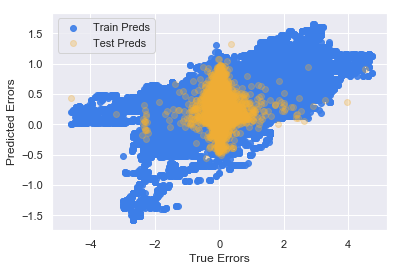

In [466]:
sns.set()

plt.scatter(y_train_reg, y_preds,color="#3c7ee8", label="Train Preds",alpha=.9)
plt.scatter(y_test_reg, y_pre,color="#f2b035", label="Test Preds",alpha=.3)
plt.xlabel("True Errors")
plt.ylabel("Predicted Errors")
plt.legend()
plt.show()

